In [234]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import numpy as np

In [235]:
data = pd.read_csv('../prices.txt', sep='\\s+', header=None, index_col=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,38.25,69.06,62.08,31.80,63.01,28.30,36.93,43.23,42.31,67.37,26.99,47.93,27.30,52.44,49.60,50.71,57.48,27.31,36.89,32.60,48.12,33.46,75.26,66.41,76.53,52.51,36.77,25.65,58.66,26.89,30.59,64.33,40.08,20.08,47.70,45.15,63.24,59.15,69.56,59.59,74.39,41.30,30.05,39.53,76.07,28.62,72.03,24.02,76.03,27.50
1,38.11,69.98,62.39,31.74,62.49,28.23,37.13,42.85,41.85,68.41,26.98,47.64,27.23,52.21,50.42,50.79,57.81,27.87,37.04,32.50,47.92,33.10,74.84,66.13,76.80,53.06,36.59,26.13,58.99,27.21,30.56,64.47,40.75,19.75,47.80,45.18,63.75,59.52,69.79,59.46,74.69,41.70,30.18,38.93,75.71,28.47,72.11,24.04,76.05,27.54
2,37.90,69.56,62.82,31.57,62.74,28.60,36.57,42.99,41.48,69.84,26.40,47.21,27.99,52.40,51.25,50.75,57.97,27.90,37.20,32.54,47.86,32.98,73.55,65.42,76.79,52.92,36.97,26.35,58.27,27.46,30.14,64.38,40.79,19.88,47.41,44.81,64.21,61.11,69.73,59.93,75.14,41.14,30.09,38.17,75.56,28.48,72.54,23.76,75.66,27.55
3,37.64,69.39,63.26,31.56,61.85,28.67,37.09,43.23,41.24,70.36,27.23,47.25,27.51,53.08,51.62,50.52,57.08,27.67,36.68,32.86,47.94,32.92,72.59,65.88,77.43,53.91,37.08,26.53,58.21,26.47,29.99,64.10,41.34,19.80,47.61,45.16,64.99,59.29,69.46,59.83,75.24,41.38,30.08,38.24,75.35,28.59,73.75,23.97,75.71,27.74
4,37.70,69.71,64.04,31.42,62.02,28.42,37.09,42.90,41.40,69.12,27.15,47.61,28.06,52.80,51.93,50.69,57.77,27.68,36.33,32.86,48.12,32.81,72.82,66.77,77.40,54.13,36.96,26.36,58.68,26.69,30.13,63.86,41.40,19.91,47.74,45.30,65.64,58.78,69.62,60.08,75.33,41.69,30.34,37.85,75.21,28.55,74.32,24.01,75.77,27.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,37.20,47.24,47.10,25.66,41.45,22.24,23.72,40.32,15.13,42.15,22.84,54.22,20.41,48.92,46.10,41.44,39.39,22.67,42.84,33.49,42.20,30.63,82.45,162.40,70.06,25.72,49.44,9.52,91.52,43.49,25.62,117.44,43.38,8.37,35.03,31.79,50.51,60.88,69.58,62.86,98.39,52.24,19.64,26.54,78.01,20.83,78.47,15.55,67.35,25.78
1496,36.88,46.91,47.50,26.07,41.44,22.10,23.69,40.09,14.83,41.80,22.55,53.28,20.23,48.58,46.27,42.00,39.66,22.95,42.61,33.52,41.92,30.71,83.06,163.03,70.33,26.05,49.32,9.47,92.43,42.42,25.44,116.49,44.40,8.25,35.06,32.14,50.30,61.17,69.99,62.84,97.40,52.94,19.94,26.30,77.59,20.98,79.36,15.52,67.29,26.05
1497,36.99,47.30,47.67,26.20,41.68,22.15,23.52,40.31,14.67,41.55,22.60,53.94,20.34,48.50,47.95,42.08,39.89,23.10,43.00,33.29,42.08,30.15,82.33,164.95,69.77,25.93,49.44,9.47,93.94,43.14,25.75,117.63,44.49,8.27,34.62,31.66,50.39,60.12,69.90,63.26,96.92,53.32,19.92,26.51,77.84,20.89,78.67,15.37,67.01,26.22
1498,36.79,47.23,47.30,25.73,41.64,22.13,23.12,40.57,14.54,42.31,22.82,55.54,19.94,48.77,47.76,41.93,40.30,22.90,42.78,33.15,42.06,29.89,84.75,165.90,70.33,25.86,49.58,9.32,92.54,43.89,25.81,117.68,43.97,8.31,34.13,31.66,50.21,61.32,69.96,63.25,97.18,54.10,19.90,26.55,77.00,20.79,78.67,15.45,67.30,26.44


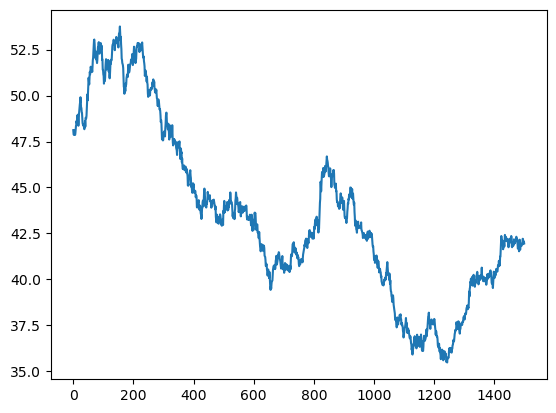

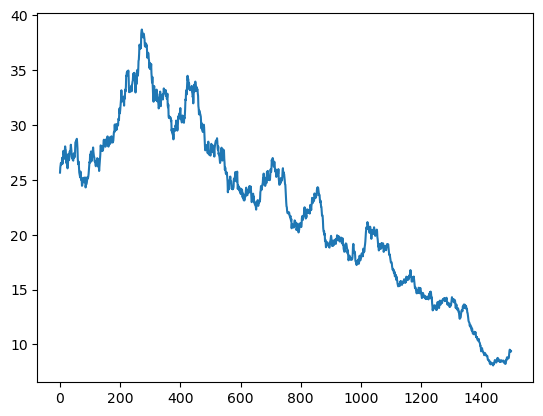

In [236]:
plt.figure()
plt.plot(data[20])
plt.figure()
plt.plot(data[27])

In [237]:
pd.set_option ("display.max_columns", None) 

In [238]:
orig_pos = pd.read_csv('../teams/setwithfriends.dump', sep='\\s+', header=None, index_col=None)
# pos = orig_pos.iloc[list(range(0, orig_pos.shape[0], 10)), :]
pos = orig_pos.copy()
pos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,22,-41,24,-50,-23,-106,-128,19,-4,-6,-41,-2,16,76,12,16,32,-111,40,26,212,-79,0,9,23,-38,-1,-187,0,-3,-143,-2,-8,-231,-64,-63,22,12,58,60,-10,31,19,-30,39,-340,12,254,-44,-86
1,22,-41,24,-50,-23,-106,-128,19,-4,-6,-41,-2,16,76,12,16,32,-111,40,26,212,-79,0,9,23,-38,-1,-187,0,-3,-143,-2,-8,-231,-64,-63,22,12,58,60,-10,31,19,-30,39,-340,12,254,-44,-86
2,22,-41,24,-50,-23,-106,-128,19,-4,-6,-41,-2,16,76,12,16,32,-111,40,26,212,-79,0,9,23,-38,-1,-187,0,-3,-143,-2,-8,-231,-64,-63,22,12,58,60,-10,31,19,-30,39,-340,12,254,-44,-86
3,22,-41,24,-50,-23,-106,-128,19,-4,-6,-41,-2,16,76,12,16,32,-111,40,26,212,-79,0,9,23,-38,-1,-187,0,-3,-143,-2,-8,-231,-64,-63,22,12,58,60,-10,31,19,-30,39,-340,12,254,-44,-86
4,22,-41,24,-50,-23,-106,-128,19,-4,-6,-41,-2,16,76,12,16,32,-111,40,26,212,-79,0,9,23,-38,-1,-187,0,-3,-143,-2,-8,-231,-64,-63,22,12,58,60,-10,31,19,-30,39,-340,12,254,-44,-86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,232,-44,-2,-138,23,-132,251,-15,-276,-35,60,-28,-192,156,0,-132,-39,-186,52,205,111,-235,-2,62,51,-140,35,-366,38,31,-115,55,18,-46,-20,16,-24,51,145,112,100,119,-172,0,76,-366,54,61,-149,-33
495,232,-44,-2,-138,23,-132,251,-15,-276,-35,60,-28,-192,156,0,-132,-39,-186,52,205,111,-235,-2,61,51,-140,35,-366,38,31,-115,55,18,-46,-20,16,-24,51,143,112,100,119,-172,0,76,-366,54,61,-148,-33
496,232,-44,-2,-138,23,-132,251,-15,-276,-35,60,-28,-192,156,0,-132,-39,-186,52,205,111,-235,-2,61,51,-140,35,-366,38,31,-115,55,18,-46,-20,16,-24,51,142,112,100,119,-172,0,76,-366,54,61,-148,-33
497,232,-44,-2,-138,23,-132,251,-15,-276,-35,60,-28,-192,156,0,-132,-39,-186,52,205,111,-235,-2,60,51,-140,35,-366,38,31,-115,55,18,-46,-20,16,-24,51,143,112,100,119,-172,0,76,-366,54,61,-149,-33


In [239]:
pos.head(10).diff(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


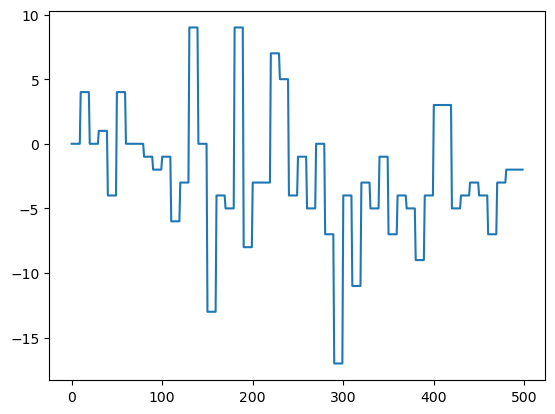

In [240]:
plt.plot(pos[22])

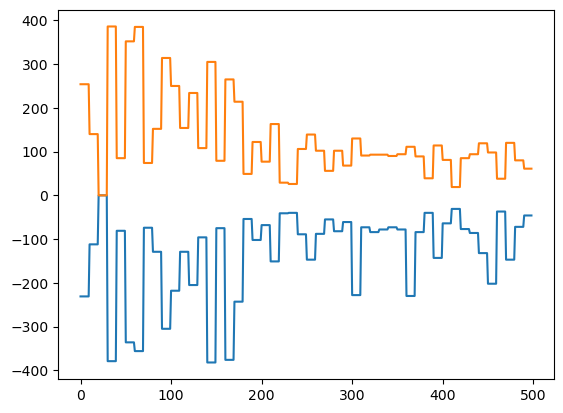

In [241]:
plt.plot(pos[33])
plt.plot(pos[47])

In [242]:
for i in range(50):
    print(i, pos[0].iloc[0], pos[i].iloc[0])
    if pos[i].iloc[0] == 0:
        pos.loc[:, i] = pos[i]
    else:
        pos.loc[:, i] = pos[i] * pos[0].iloc[0] / pos[i].iloc[0]

0 22 22
1 22 -41
2 22 24
3 22 -50
4 22 -23
5 22 -106
6 22 -128
7 22 19
8 22 -4
9 22 -6
10 22 -41
11 22 -2
12 22 16
13 22 76
14 22 12
15 22 16
16 22 32
17 22 -111
18 22 40
19 22 26
20 22 212
21 22 -79
22 22 0
23 22 9
24 22 23
25 22 -38
26 22 -1
27 22 -187
28 22 0
29 22 -3
30 22 -143
31 22 -2
32 22 -8
33 22 -231
34 22 -64
35 22 -63
36 22 22
37 22 12
38 22 58
39 22 60
40 22 -10
41 22 31
42 22 19
43 22 -30
44 22 39
45 22 -340
46 22 12
47 22 254
48 22 -44
49 22 -86


C:\Users\khang\AppData\Local\Temp\ipykernel_18456\3807137346.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[22.         22.         22.         22.         22.         22.
 22.         22.         22.         22.         47.2195122  47.2195122
 47.2195122  47.2195122  47.2195122  47.2195122  47.2195122  47.2195122
 47.2195122  47.2195122  -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 33.80487805 33.80487805 33.80487805 33.80487805 33.80487805 33.80487805
 33.80487805 33.80487805 33.80487805 33.80487805 62.7804878  62.7804878
 62.7804878  62.7804878  62.7804878  62.7804878  62.7804878  62.7804878
 62.7804878  62.7804878  41.85365854 41.85365854 41.85365854 41.85365854
 41.85365854 41.85365854 41.85365854 41.85365854 41.85365854 41.85365854
 40.24390244 40.24390244 40.24390244 40.24390244 40.24390244 40.24390244
 40.24390244 40.24390244 40.24390244 40.

In [243]:
pos[0]

0       22
1       22
2       22
3       22
4       22
      ... 
494    232
495    232
496    232
497    232
498    232
Name: 0, Length: 499, dtype: int64

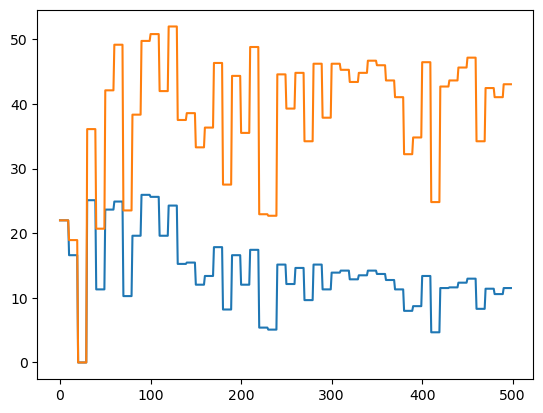

In [244]:
plt.plot(pos[20])
plt.plot(pos[27])

In [245]:
# Convert to decision
def convert_to_decision(pos_diff):
    result = []
    for diff in pos_diff:
        if diff == 0:
            result.append(0)
        elif diff > 0:
            result.append(1)
        else:
            result.append(-1)
    return result

decision_pos = []
pos = orig_pos.iloc[list(range(0, orig_pos.shape[0], 10)), :]
for i in range(1, pos.shape[0]):
    decision_pos.append(convert_to_decision(pos.iloc[i].values - pos.iloc[i-1].values))
decision_pos = pd.DataFrame(decision_pos, columns=pos.columns) 
for i in range(50):
    decision_pos[i] = decision_pos[i] * decision_pos[i].iloc[0]
decision_pos = decision_pos.iloc[30:40]
decision_pos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
30,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,1,-1,1,1,1,-1,1,-1,-1,1,0,-1,1,-1,-1,1,1,-1,1,-1,1,1,-1,1,1,1,1,-1,-1
31,1,1,1,1,1,-1,-1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,1,-1,1,1,1,1,-1,-1,1,-1,1,1,-1,-1,1,-1,1,-1,-1,1,1,-1,-1,-1,-1,0
32,1,-1,1,-1,-1,1,1,-1,-1,-1,-1,1,-1,1,1,1,-1,1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,1,-1,1,1,-1,-1,-1,-1,0,-1,0,-1,1,-1,-1,-1,1,0,-1,-1
33,1,-1,-1,-1,-1,1,1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,1,-1,1,1,1,-1,1,-1,-1,-1,0,1,-1,-1,1,-1,-1,1,1,-1,1,-1,-1,1,-1,1,1,-1,1,0,-1
34,1,1,1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,0,-1,-1,-1,1,1,1,-1,-1,1,-1,-1,1,1,1,-1,-1,1,1,-1,1,1,-1,-1,0,-1,1,1,-1,1,-1,-1,1,-1,1,-1
35,-1,-1,-1,1,-1,-1,1,1,1,1,1,1,1,-1,-1,-1,1,-1,0,-1,1,1,1,-1,1,-1,1,1,1,1,-1,-1,1,-1,0,1,1,1,1,0,0,-1,0,1,1,-1,0,-1,-1,-1
36,1,1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,-1,1,1,1,-1,1,1,-1,-1,1,1,1,1,0,1,1,0,0,1,1,1,1,-1,1,1,1,1,1,-1,1,1,1,1,1,1
37,-1,1,1,1,0,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,1,-1,1,1,-1,1,1,1,1,1,1,1,1,-1,1,1,1,1,-1,1,-1,1,-1,1,1,1,1,1,-1,1,1,1
38,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,1,-1,0,-1
39,-1,-1,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,1,-1,-1,1,1,0,1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,0,1,-1,-1,1,-1,-1,1,1,-1,1,1,1


In [246]:
groups = []
for i in range(50):
    found = False
    for group in groups:
        if abs(decision_pos[i] - decision_pos[group[0]]).sum() <= 2:
            group.append(i)
            found = True
            break 
    if not found:
        groups.append([i])
groups

[[0],
 [1, 2, 4, 18, 20, 26, 34, 35],
 [3, 8, 24, 27],
 [5, 13, 15, 17, 25, 30, 33, 45, 47],
 [6],
 [7, 9, 16, 36],
 [10, 40],
 [11],
 [12, 21, 39],
 [14],
 [19],
 [22],
 [23],
 [28, 32, 43],
 [29],
 [31],
 [37],
 [38],
 [41],
 [42],
 [44],
 [46],
 [48],
 [49]]

First 10:

[[0, 7, 16, 17, 19, 26, 31, 36, 38, 49],
 [1, 2, 3, 4, 10, 11, 14, 18, 21, 23, 24, 27, 28, 34, 35, 37, 39, 41, 43, 44],
 [5, 20, 33, 45, 47],
 [6],
 [8, 9, 12, 15, 25, 40, 42, 46],
 [13, 22, 30, 32],
 [29],
 [48]]

Second 10:
[[0, 19],
 [1, 3, 5, 8, 12, 15, 20, 21, 24, 25, 26, 27, 33, 34, 35, 40, 42, 44, 45, 47],
 [2, 4, 18, 29, 32, 41, 43],
 [6],
 [7, 16, 36],
 [9, 11, 37],
 [10],
 [13, 17, 30],
 [14, 23],
 [22],
 [28],
 [31],
 [38],
 [39],
 [46],
 [48],
 [49]]

20-30:
[[0, 19],
 [1, 3, 8, 12, 20, 27, 28, 29, 34, 41],
 [2, 14, 39],
 [4, 10, 32, 35, 43],
 [5, 18, 21, 33, 42, 45, 47, 49],
 [6, 31],
 [7],
 [9, 46],
 [11],
 [13, 17],
 [15],
 [16],
 [22],
 [23],
 [24, 26],
 [25, 40],
 [30],
 [36],
 [37],
 [38],
 [44],
 [48]]


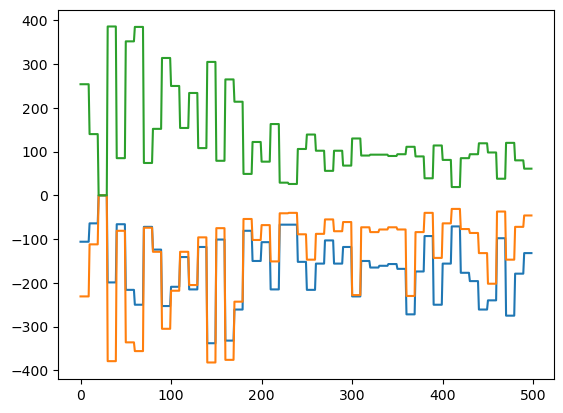

In [247]:
plt.plot(orig_pos[5])
plt.plot(orig_pos[33])
plt.plot(orig_pos[47])


<Axes: >

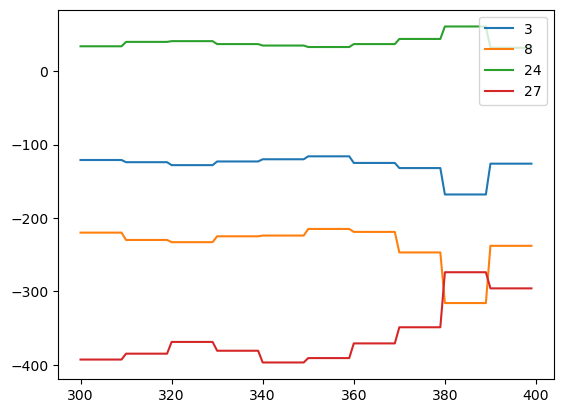

In [254]:
orig_pos[[3, 8, 24, 27]].iloc[300:400].plot()

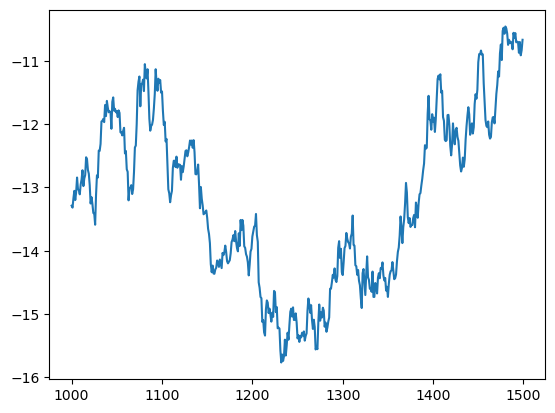

In [257]:
plt.plot(-(data[5] + 0.5 * data[33] - data[47]).iloc[1000:])

<Axes: >

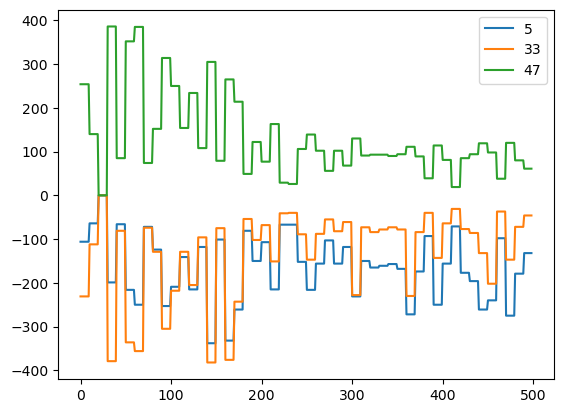

In [256]:
orig_pos[[5, 33, 47]].plot()

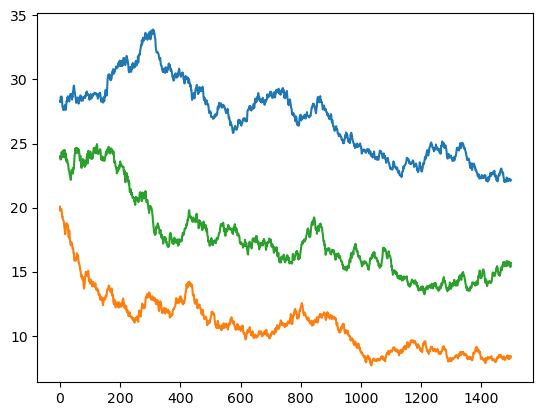

In [249]:
plt.plot(data[5])
plt.plot(data[33])
plt.plot(data[47])

In [250]:
print(np.corrcoef(data[5].pct_change().dropna(),
                 data[33].pct_change().dropna()))

[[1.       0.033237]
 [0.033237 1.      ]]


In [251]:
result = coint_johansen(data[[5, 33, 47]], det_order=0, k_ar_diff=1)
print(result.eig)
print(result.evec)
print(result.lr2)
print(result.max_eig_stat)
print(result.max_eig_stat_crit_vals)

[0.02060134 0.00858435 0.00114308]
[[ 0.31774013  0.07530076 -0.3791069 ]
 [-0.65295519  0.50702423 -0.12061745]
 [ 0.04080328 -0.58595906  0.15588033]]
[31.18312553 12.914871    1.71330939]
[31.18312553 12.914871    1.71330939]
[[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


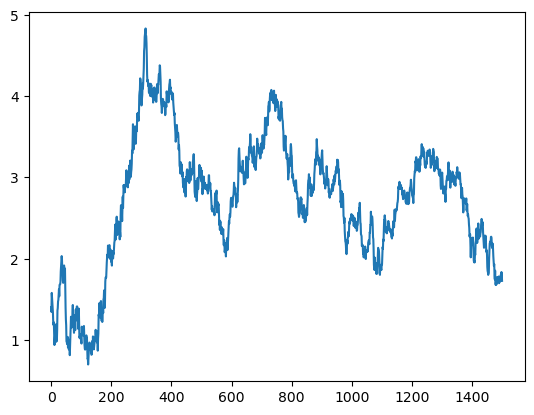

In [252]:
plt.plot(0.31774013 * data[5] + 0.07530076 * data[33] + -0.3791069 * data[47])

In [259]:
all = set(range(50))
removed = set([3, 6, 7, 12, 14, 15, 18, 22, 26, 28, 30, 33, 40, 42, 43, 45, 48, 49])
remain = all - removed
print(list(remain))
print(len(remain))

[0, 1, 2, 4, 5, 8, 9, 10, 11, 13, 16, 17, 19, 20, 21, 23, 24, 25, 27, 29, 31, 32, 34, 35, 36, 37, 38, 39, 41, 44, 46, 47]
32


Other teams

setwithfriends: Trade in interval of 10. Largely uncorrelated trade for each stock, so likely no grouping (or refit every 100 or so, leading to no sequence).

crab: Group everything into 1 etf: [0, 1, 2, 4, 5, 8, 9, 10, 11, 13, 16, 17, 19, 20, 21, 23, 24, 25, 27, 29, 31, 32, 34, 35, 36, 37, 38, 39, 41, 44, 46, 47]. Filter off 18 stocks. Might overfit.

crack: Invert few stocks: [6, 12, 15, 18, 42, 49]

teamraj: Same thing as us, prob higher threshold.

bidoof: Seems like stop loss luck roll.




In [273]:
data.sum(axis=1).iloc[::10].pct_change().dropna().autocorr(lag=1)

0.11496899209575306

In [278]:
data.sum(axis=1).diff().diff().diff().dropna().autocorr(lag=1)

-0.6045725931835345

In [279]:
data.sum(axis=1).diff().diff().diff()

0         NaN
1         NaN
2         NaN
3        5.99
4        0.70
        ...  
1495    -1.93
1496    -5.64
1497    10.33
1498    -5.79
1499    -3.90
Length: 1500, dtype: float64

[0.2869495377937845, 0.17905058121508546, 0.04096173126313876, -0.05142840155709542, 0.03762298784558414, 0.07951156526755811, 0.07463602765978485, 0.04307089637027043, 0.03586721794692166]


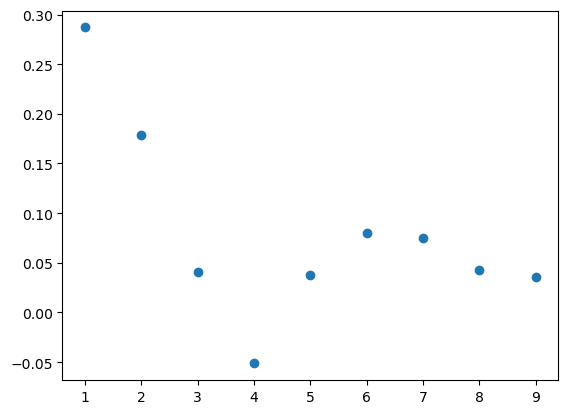

In [269]:
remain = [0, 1, 2, 4, 5, 8, 9, 10, 11, 13, 16, 17, 19, 20, 21, 23, 24, 25, 27, 29, 31, 32, 34, 35, 36, 37, 38, 39, 41, 44, 46, 47]
corr = []
result = []
BACK = 10
for i in range(1, BACK):
    corr = data[remain].iloc[1000:1500].sum(axis=1).pct_change().dropna().autocorr(lag=i)
    result.append(corr)
print(result)
plt.scatter(list(range(1, BACK)), result)


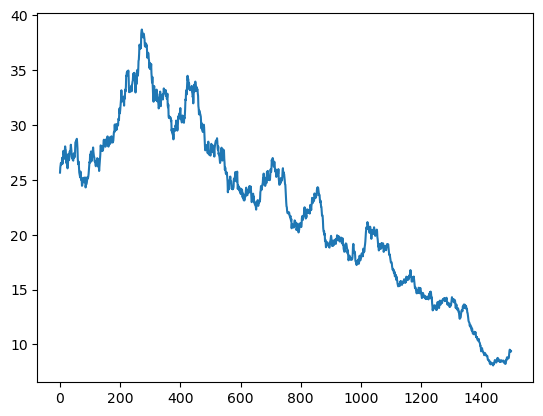

In [270]:
plt.plot(data[27])